Распределение классов в обучающей выборке:
h
1    6447
0    2359
Name: count, dtype: int64

Распределение классов в тестовой выборке:
h
1    1617
0     585
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


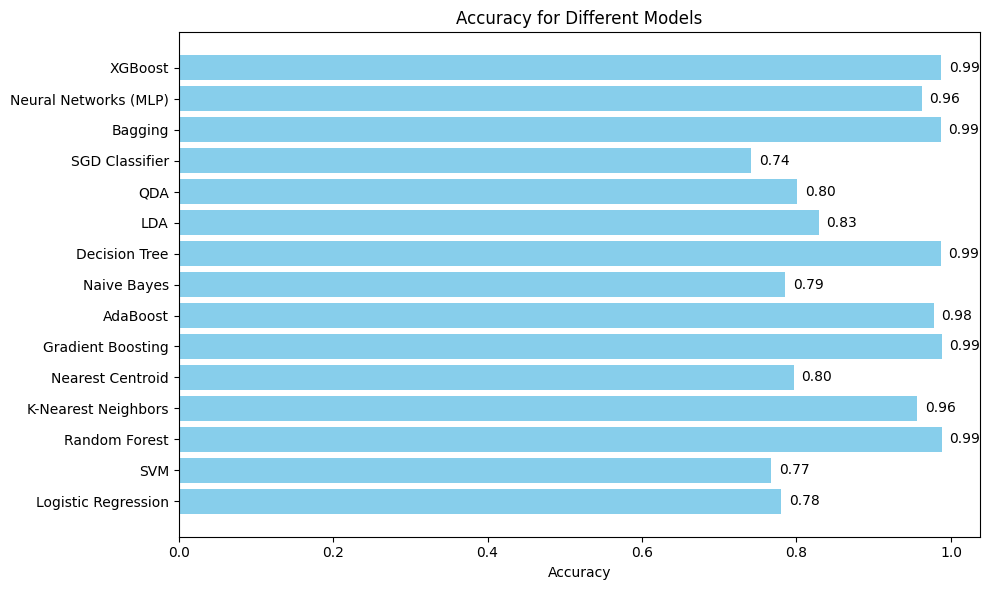

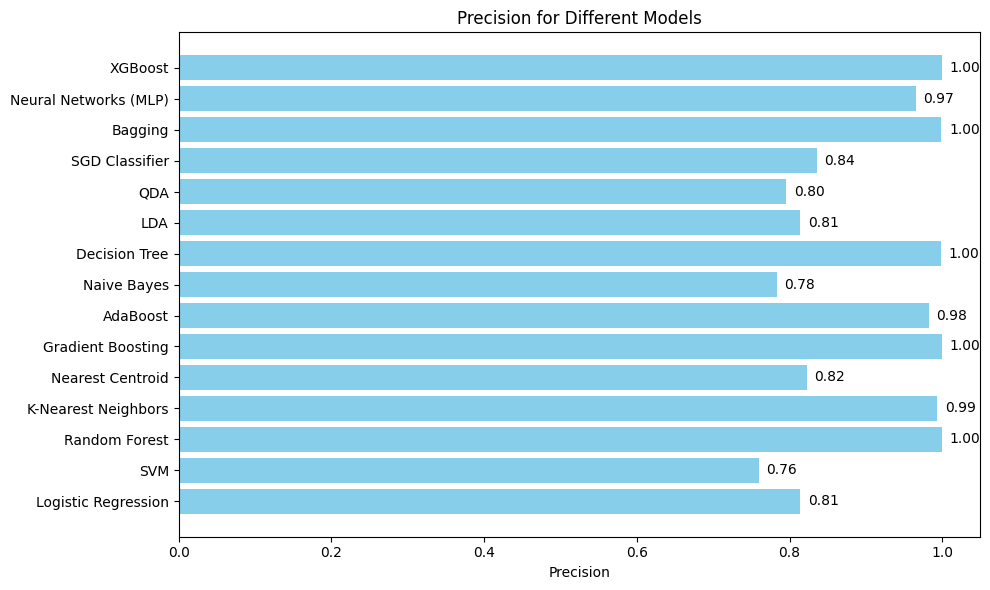

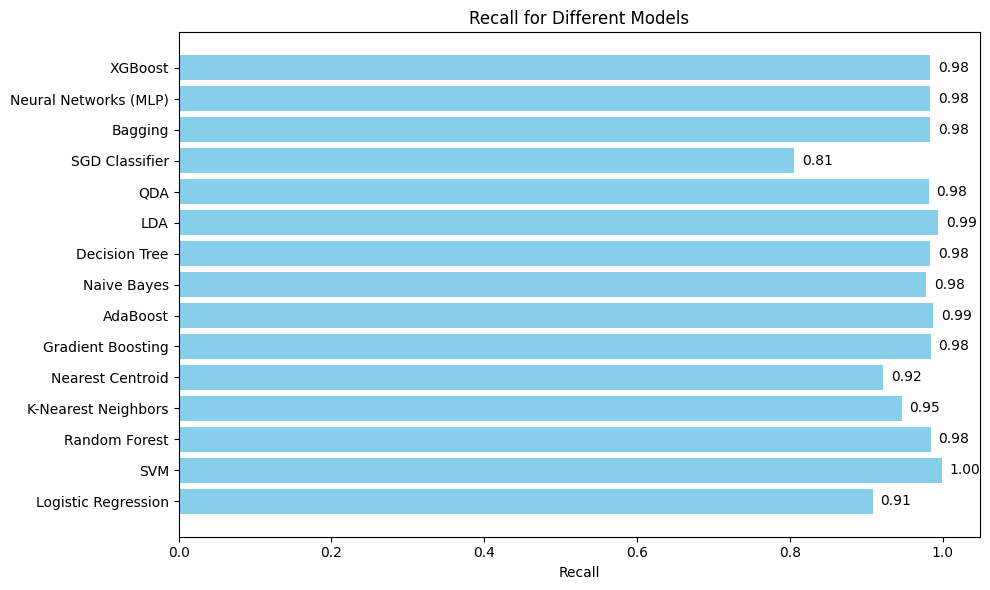

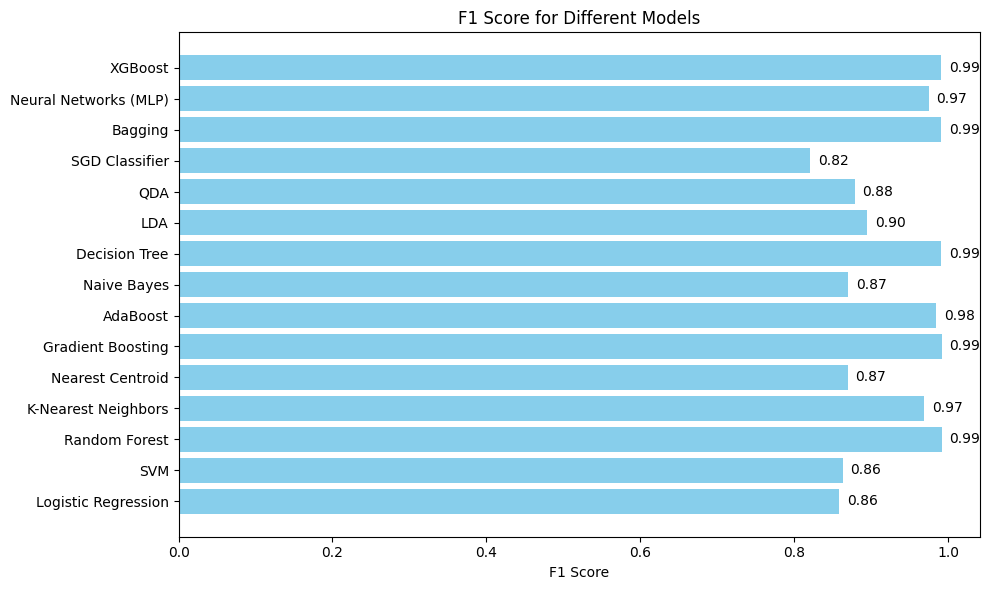

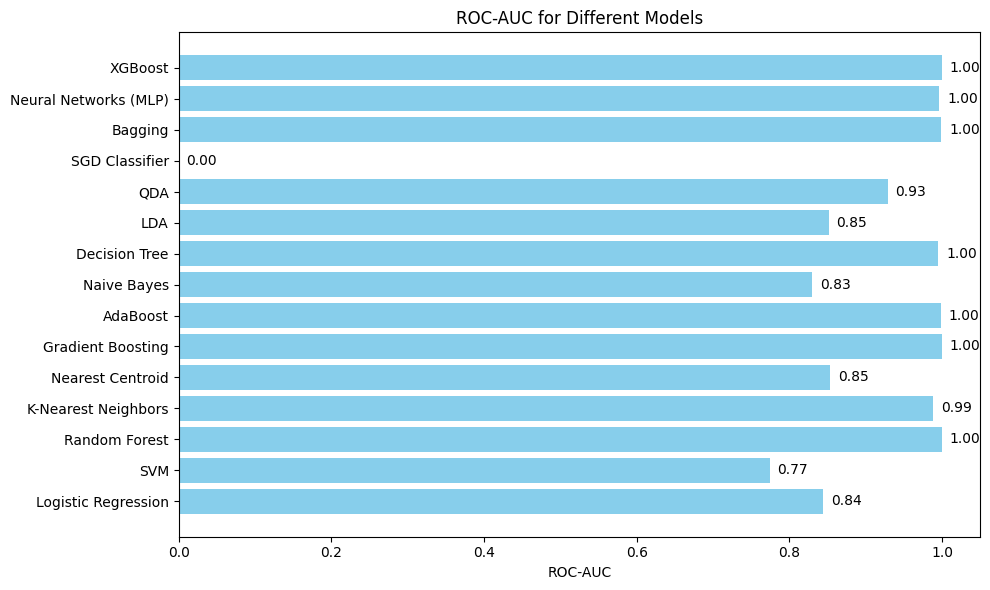

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Загрузка данных из CSV
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AI_phase_diagram/Final_version/data/Main_Data_Model_0_1.csv')

# Разделение данных
y = data["h"]
X = data[["E", "C", "FM", "Xfm", "AFM", "Xafm"]]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка распределения классов в тестовой и обучающей выборке
print("Распределение классов в обучающей выборке:")
print(y_train.value_counts())

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())

# Список моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Nearest Centroid': NearestCentroid(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier()),
    'Neural Networks (MLP)': MLPClassifier(max_iter=1000),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Списки для хранения метрик
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
model_names = []

# Обучение и расчет метрик для каждой модели
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Обучение модели
    y_pred = model.predict(X_test)  # Предсказание
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Для ROC-AUC

    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Добавляем метрики в списки
    model_names.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(auc_roc if auc_roc is not None else 0)  # Если не было ROC-AUC, добавляем 0

# Визуализация метрик
metrics = {
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list,
    'ROC-AUC': roc_auc_list
}

# Построение графиков
for metric_name, metric_values in metrics.items():
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, metric_values, color='skyblue')
    plt.xlabel(metric_name)
    plt.title(f'{metric_name} for Different Models')
    plt.tight_layout()

    # Добавление значений метрик на график
    for bar, value in zip(bars, metric_values):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

    plt.show()